Equivalent kernel computation and visualization

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['lines.linewidth'] = 2

# definisce un vettore di colori
colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

Definizione delle funzioni di base gaussiane

In [3]:
# deviazione standard delle funzioni base
sd = .4
def gaussian_basis(x, m, s=sd):
    return np.exp(-((x-m)**2)/(2*s**2))
    
def vphi(x, d, dom):
    l = np.linspace(dom[0], dom[1], d+1)
    mus = [(l[i]+l[i+1])/2.0 for i in range(len(l)-1)]
    return np.array([gaussian_basis(x, mus[i]) for i in range(d)]).T

Genera la matrice delle features e il vettore target

In [10]:
# numero di elementi da generare
n=50

# dominio della feature
domain=(-1,1)

n_coeff = 5

Plot delle funzioni di base nel dominio

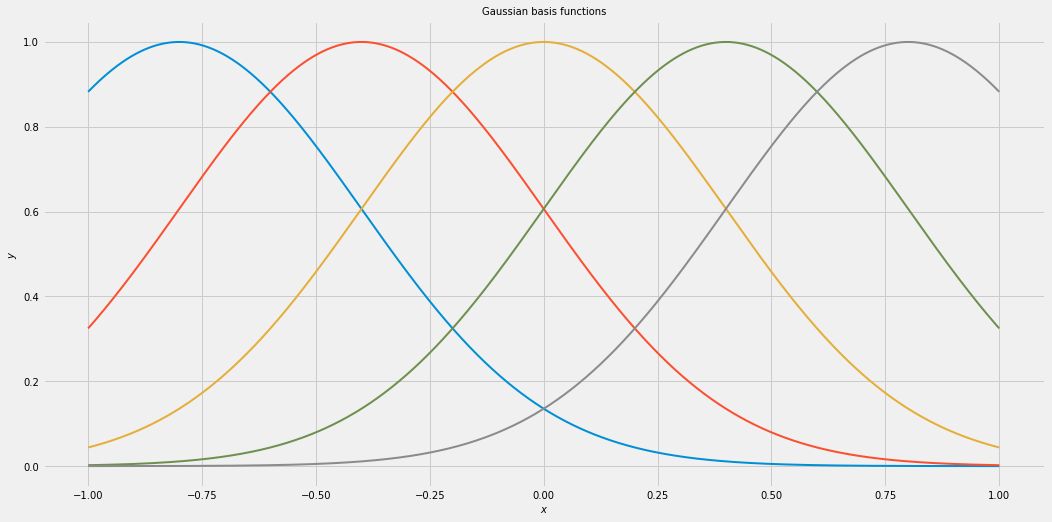

In [11]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
l = np.linspace(domain[0], domain[1], n_coeff+1)
mus = [(l[i]+l[i+1])/2.0 for i in range(len(l)-1)]
x = np.linspace(domain[0], domain[1], 1000)
for i in range(n_coeff):
    ax.plot(x, gaussian_basis(x, mus[i]), color = colors[i])
plt.xlabel(u'$x$', fontsize=10)
plt.ylabel(u'$y$', fontsize=10)
plt.title('Gaussian basis functions')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [12]:
# array delle feature generato casualmente nel dominio
X=np.random.uniform(domain[0], domain[1], n)
# array delle feature generato uniformemente nel dominio
#X = np.linspace(-1,1,200)

In [13]:
# genera il vettore target mediante la funzione f e l'aggiunta di rumore gaussiano

def f(x):
    return 0.7+0.25*x*np.sqrt(abs(np.sin(x)))
# sd del rumore
noise = .05

#genera target
t=np.array([(f(v)+np.random.normal(0,noise,1))[0] for v in X]).reshape(-1,1)

Genera immagine di $X$ per la regressione

In [14]:

Phi = vphi(X,n_coeff, domain)

Plot del dataset

In [15]:
# iperparametro per il prior
alfa=.2
# parametri del prior
mu_prior=np.zeros(n_coeff)
sigma_prior=np.eye(n_coeff)*alfa

# parametro per la verosimiglianza
beta=.9

sigma_post = np.linalg.inv(sigma_prior + beta*np.dot(Phi.T, Phi))

mu_post = beta*np.dot(sigma_post, np.dot(Phi.T, t))


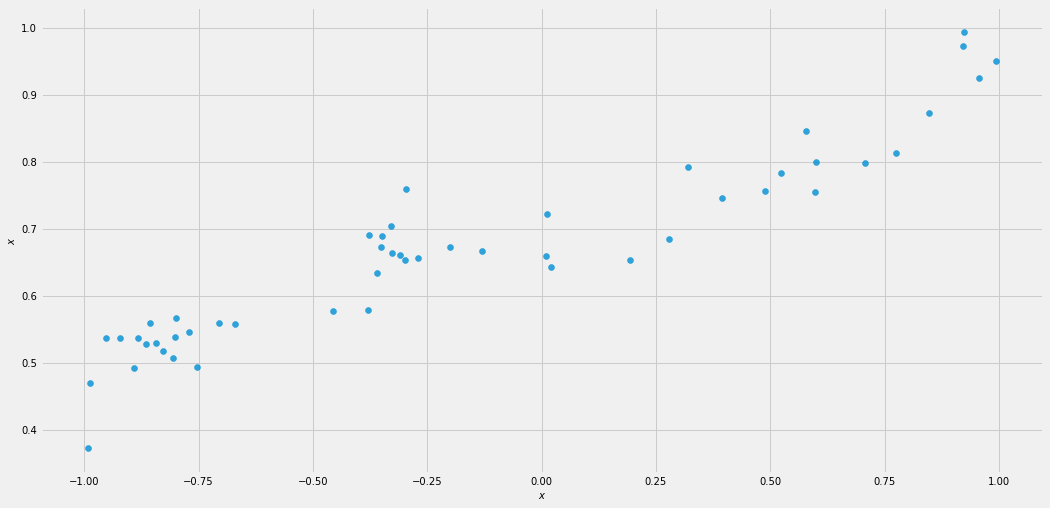

In [16]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(X, t, marker='o', alpha=.8)
plt.xlabel(u'$x$', fontsize=10)
plt.ylabel(u'$x$', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Calcolo parametri della distribuzione gaussiana a posteriori

In [17]:
# iperparametro per il prior
alfa=.2
# parametri del prior
mu_prior=np.zeros(n_coeff)
sigma_prior=np.eye(n_coeff)*alfa

# parametro per la verosimiglianza
beta=.9

sigma_post = np.linalg.inv(sigma_prior + beta*np.dot(Phi.T, Phi))

mu_post = beta*np.dot(sigma_post, np.dot(Phi.T, t))


Definizione della funzione di kernel equivalente

In [18]:
def equiv_kernel(x1,x2):
    return beta*np.dot(vphi(x1,n_coeff,domain).T, np.dot(sigma_post, vphi(x2,n_coeff,domain)))
    
func=np.vectorize(lambda x,y:equiv_kernel(x,y))


Plot della funzione su una griglia di valori

In [19]:
n_values = 200
# definisce un array di 200 valori distribuiti lineramente tra 0 e 1 per la dimensione x
x = np.linspace(-1, 1, n_values)
# definisce un array di 200 valori distribuiti lineramente tra 0 e 1 per la dimensione y
y = np.linspace(-1, 1, n_values)
# definisce una griglia bidimensionale a partire dagli array per x e y
# in X i valori delle ascisse dei punti sulla griglia, in Y i valori delle ordinate
XX,YY = np.meshgrid(x, y)
# calcola in Z i valori della funzione su tutti i punti della griglia
Z=func(XX,YY)

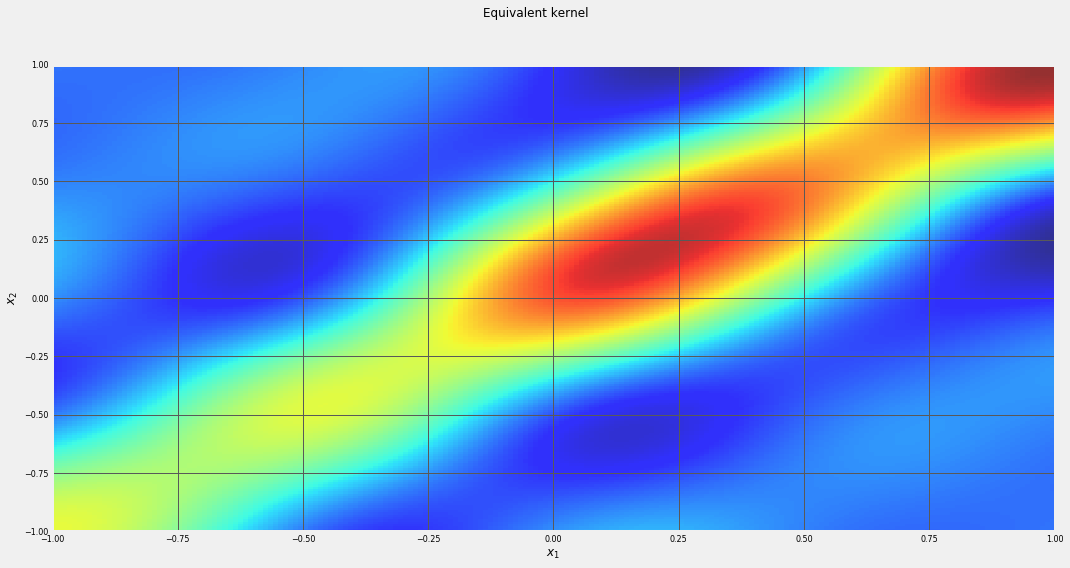

In [20]:
fig = plt.figure(figsize=(16,8))
ax=fig.gca()
imshow_handle = ax.imshow(Z, origin='lower', extent=(x.min(),x.max(), y.min(), y.max()), aspect='auto', alpha=.8)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
plt.xlim(-1,1)
plt.ylim(-1,1)
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.grid(b=True, which='both', color='0.35')
plt.suptitle(u'Equivalent kernel')
plt.show()

Andamento in funzione di $x_1$, per diversi valori di $x_2$

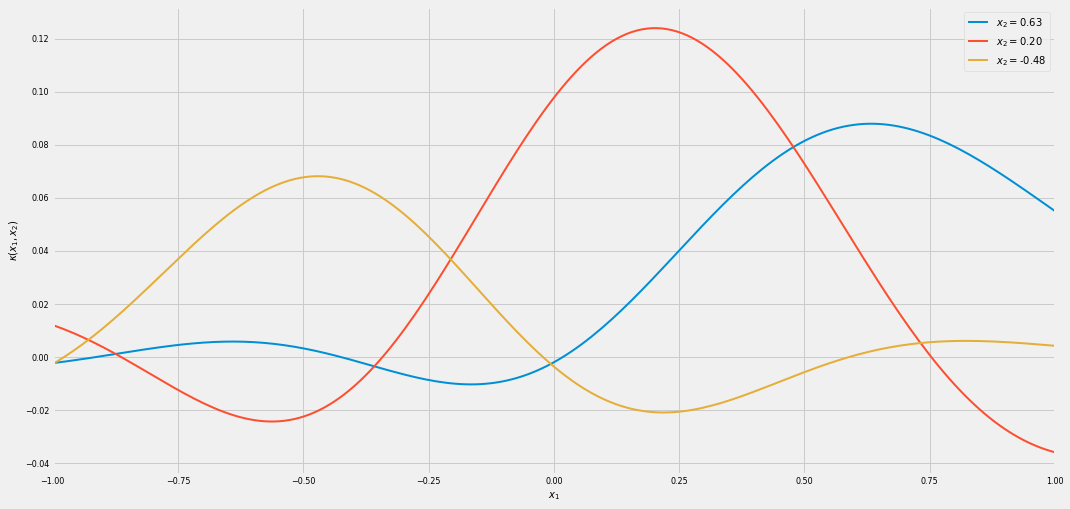

In [21]:
a = [.63, .2, -.48]
fig = plt.figure(figsize=(16,8))
ax=fig.gca()
for i in a:
    plt.plot(x,Z[int((1+i)*n_values/2),:], label='$x_2=${0:3.2f}'.format(i))
plt.xlim(-1,1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$\kappa(x_1,x_2)$')
plt.legend()
plt.show()